# USING EDLUT SIMULATOR FROM JUPYTER NOTEBOOKS

Import EDLUT package (note that this package needs to be previously set to be accesible from the current kernel or virtual environment)

In [1]:
import pyedlut as pyedlut

Create a new simulation object

In [2]:
simulation = pyedlut.PySimulation_API()

Check all the methods available in simulation object (pyedlut.PySimulation_API() class)

In [3]:
print(dir(simulation))

['AddExternalCurrentActivity', 'AddExternalSpikeActivity', 'AddFileInputCurrentActivityDriver', 'AddFileInputSpikeActivityDriver', 'AddFileOutputMonitorDriver', 'AddFileOutputSpikeActivityDriver', 'AddFileOutputWeightDriver', 'AddLearningRule', 'AddNeuronLayer', 'AddSynapticLayer', 'GetAvailableIntegrationMethods', 'GetAvailableLearningRules', 'GetAvailableNeuronModels', 'GetCompressedWeights', 'GetIntegrationMethodDefParams', 'GetLearningRuleDefParams', 'GetLearningRuleParams', 'GetNeuronModelDefParams', 'GetNeuronModelInfo', 'GetNeuronParams', 'GetSelectedWeights', 'GetSpecificNeuronParams', 'GetSpikeActivity', 'GetVectorizableParameters', 'GetWeights', 'Initialize', 'PrintAvailableIntegrationMethods', 'PrintAvailableLearningRules', 'PrintAvailableNeuronModels', 'PrintNeuronModelInfo', 'PrintVectorizableParameters', 'RunSimulation', 'SetLearningRuleParams', 'SetSimulationParameters', 'SetSpecificNeuronParams', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', 

And check the doc for one of those methods

In [4]:
help(simulation.GetSelectedWeights)

Help on built-in function GetSelectedWeights:

GetSelectedWeights(...) method of simulation_wrapper.PySimulation_API instance
    It retrieves the synaptic weights of the solicited synapses (one value for each synapse).
    
    :param indexes: list of solicited synapses
    :return: A list (weights) with the synaptics weights.
    :rtype: list[float]



Set the number of OPENMP threads to be used during the simulation (if the OPENMP option has been set during compilation)

In [5]:
simulation_parameters = {
    'num_simulation_queues': 4,
}
simulation.SetSimulationParameters(simulation_parameters)

Show all the available neuron models in EDLUT

In [6]:
NeuronModelList = simulation.GetAvailableNeuronModels() # Retrieve the list of neuron models
print(NeuronModelList) # Print the list of neuron models

['InputCurrentNeuronModel', 'InputSpikeNeuronModel', 'PoissonGeneratorDeviceVector', 'SinCurrentDeviceVector', 'AdExTimeDrivenModel', 'AdExTimeDrivenModelVector', 'EgidioGranuleCell_TimeDriven', 'HHTimeDrivenModel', 'IzhikevichTimeDrivenModel', 'LIFTimeDrivenModel', 'LIFTimeDrivenModel_IS', 'TimeDrivenInferiorOliveCell', 'TimeDrivenPurkinjeCell', 'TimeDrivenPurkinjeCell_IP', 'CompressSynchronousTableBasedModel', 'CompressTableBasedModel', 'SynchronousTableBasedModel', 'TableBasedModel']


Show all the available Integration methods in EDLUT

In [7]:
IntegrationMethodList = simulation.GetAvailableIntegrationMethods()
print(IntegrationMethodList)

['BDF', 'Bifixed_Euler', 'Bifixed_RK2', 'Bifixed_RK4', 'Euler', 'RK2', 'RK4']


Show all the available learning rules in EDLUT

In [8]:
LearningRuleList = simulation.GetAvailableLearningRules()
print(LearningRuleList)

['ExpBufferedAdditiveKernel', 'ExpAdditiveKernel', 'CosAdditiveKernel', 'SimetricCosBufferedAdditiveKernel', 'SimetricCosSinSTDPAdditiveKernel', 'SimetricCosSinAdditiveKernel', 'SimetricCosSTDPAdditiveKernel', 'SimetricCosAdditiveKernel', 'SinBufferedAdditiveKernel', 'SinAdditiveKernel', 'STDPLS', 'STDP']


## Query Neuron Model, Integration Method and Learning Rule Parameters

We can get information about the parameters of the neuron models

In [9]:
for model_name in NeuronModelList:
    default_params = simulation.GetNeuronModelInfo(model_name);
    print('Neuron model:',model_name)
    print('Info:',default_params['info'])
    for name,value in zip(default_params.keys(),default_params.values()):
        if (name!='info'):
            print(name,'->',value)

Neuron model: InputCurrentNeuronModel
Info: CPU Event-driven input device able to propagate input current events (defined in pA) to other neurons
Neuron model: InputSpikeNeuronModel
Info: CPU Event-driven input device able to propagate input spikes events to other neurons
Neuron model: PoissonGeneratorDeviceVector
Info: CPU Poisson generator device able to generate and propagate spike trains to other neuron models
frequency -> Poisson generator device frequency (Hz): VECTOR
Neuron model: SinCurrentDeviceVector
Info: CPU Sinusoidal current device able to generate and propagate a sinusoidal current (in pA) to other neuron models
amplitude -> Sinusoidal amplitude (pA): VECTOR
frequency -> Sinusoidal frequency (Hz): VECTOR
offset -> Sinusoidal offset (pA): VECTOR
phase -> Sinusoidal phase (rad): VECTOR
Neuron model: AdExTimeDrivenModel
Info: CPU Time-driven Adaptative Exponential Integrate and Fire (AdEx) neuron model with two differential equations(membrane potential (v) and membrane reco

We can also obtain the the default values for every parameter in the neuron models.

In [10]:
for model_name in NeuronModelList:
    default_params = simulation.GetNeuronModelDefParams(model_name);
    print('Default parameters for',model_name,'model:')
    for name,value in zip(default_params.keys(),default_params.values()):
        print(name,'->',value)

Default parameters for InputCurrentNeuronModel model:
Default parameters for InputSpikeNeuronModel model:
Default parameters for PoissonGeneratorDeviceVector model:
frequency -> 10.0
Default parameters for SinCurrentDeviceVector model:
amplitude -> 200.0
frequency -> 1.0
offset -> 200.0
phase -> 0.0
Default parameters for AdExTimeDrivenModel model:
a -> 1.0
b -> 9.0
c_m -> 110.0
e_exc -> 0.0
e_inh -> -80.0
e_leak -> -65.0
e_reset -> -80.0
g_leak -> 10.0
int_meth -> <simulation_wrapper.PyModelDescription object at 0x7fa4c981ad68>
tau_exc -> 5.0
tau_inh -> 10.0
tau_nmda -> 20.0
tau_w -> 50.0
thr_slo_fac -> 2.0
v_thr -> -50.0
Default parameters for AdExTimeDrivenModelVector model:
a -> 1.0
b -> 9.0
c_m -> 110.0
e_exc -> 0.0
e_inh -> -80.0
e_leak -> -65.0
e_reset -> -80.0
g_leak -> 10.0
int_meth -> <simulation_wrapper.PyModelDescription object at 0x7fa4c98266d8>
tau_exc -> 5.0
tau_inh -> 10.0
tau_nmda -> 20.0
tau_w -> 50.0
thr_slo_fac -> 2.0
v_thr -> -50.0
Default parameters for EgidioGran

Similarly, we could check the default parameters for each integration method.

In [11]:
for im_name in IntegrationMethodList:
    default_params = simulation.GetIntegrationMethodDefParams(im_name)
    print('Default parameters for',im_name,'integration method:')
    for name,value in zip(default_params.keys(),default_params.values()):
        print(name,'->',value)

Default parameters for BDF integration method:
bdf_order -> 2
name -> BDF
step -> 0.0010000000474974513
Default parameters for Bifixed_Euler integration method:
n_steps -> 2
name -> Bifixed_Euler
step -> 0.0010000000474974513
Default parameters for Bifixed_RK2 integration method:
n_steps -> 2
name -> Bifixed_RK2
step -> 0.0010000000474974513
Default parameters for Bifixed_RK4 integration method:
n_steps -> 2
name -> Bifixed_RK4
step -> 0.0010000000474974513
Default parameters for Euler integration method:
name -> Euler
step -> 0.0010000000474974513
Default parameters for RK2 integration method:
name -> RK2
step -> 0.0010000000474974513
Default parameters for RK4 integration method:
name -> RK4
step -> 0.0010000000474974513


And finally, we can also ask the default parameters for each learning rule.

In [12]:
for lr_name in LearningRuleList:
    # Get the default parameter values of the neuron model
    default_params = simulation.GetLearningRuleDefParams(lr_name);
    print('Default parameters for',lr_name,'learning rule:')
    for name,value in zip(default_params.keys(),default_params.values()):
        print(name,'->',value)

Default parameters for ExpBufferedAdditiveKernel learning rule:
fixed_change -> 0.0010000000474974513
init_time -> 0.0
kernel_change -> 0.009999999776482582
kernel_peak -> 0.10000000149011612
Default parameters for ExpAdditiveKernel learning rule:
fixed_change -> 0.0010000000474974513
kernel_change -> 0.009999999776482582
kernel_peak -> 0.10000000149011612
Default parameters for CosAdditiveKernel learning rule:
exp -> 2
fixed_change -> 0.0010000000474974513
kernel_change -> 0.009999999776482582
tau -> 0.10000000149011612
Default parameters for SimetricCosBufferedAdditiveKernel learning rule:
exp -> 2
fixed_change -> 0.0010000000474974513
kernel_change -> 0.009999999776482582
tau -> 0.10000000149011612
Default parameters for SimetricCosSinSTDPAdditiveKernel learning rule:
central_amp -> 0.009999999776482582
lateral_amp -> 0.004999999888241291
max_min_dist -> 0.05000000074505806
Default parameters for SimetricCosSinAdditiveKernel learning rule:
central_amp -> 0.009999999776482582
lateral

## Network Definition

Add three input layers. The first one contains 3 neurons injecting spikes to the network. 

In [13]:
input_spike_layer = simulation.AddNeuronLayer(
        num_neurons=3,
        model_name='InputSpikeNeuronModel',
        param_dict={},
        log_activity=False,
        output_activity=True)

The second one contains also 3 neurons injecting current to the network

In [14]:
input_current_layer = simulation.AddNeuronLayer(
        num_neurons=3,
        model_name='InputCurrentNeuronModel',
        param_dict={},
        log_activity=False,
        output_activity=False)

The third one contains 3 neurons injecting sinosuoidal current to the network

In [15]:
sin_current_layer = simulation.AddNeuronLayer(
        num_neurons=3,
        model_name='SinCurrentDeviceVector',
        param_dict={},
        log_activity=False,
        output_activity=False)

And now, the output layer. First, define the integration method to be used (Euler). Second, the neuron model parameters. And third, the neuron layer.

In [16]:
# Define the integration method params by creating a PyModelDescription object.
integration_method = pyedlut.PyModelDescription(model_name='Euler', params_dict={'step': 0.001})
# Define the neuron model params by creating a dictionary 
# (including the PyModelDescription object corresponding to the integration method object)
nm_params = {
    'tau_ref': 1.0,
    'v_thr': -50.0,
    'e_exc': 0.0,
    'e_inh': -80.0,
    'e_leak': -65.0,
    'g_leak': 0.2,
    'c_m': 2.0,
    'tau_exc': 0.5,
    'tau_inh': 10.0,
    'tau_nmda': 15.0,
    'int_meth': integration_method
}
# Create the output layer with LIFTimeDrivenModel neurons with nm_params
output_layer = simulation.AddNeuronLayer(
    num_neurons = 20000,
    model_name = 'LIFTimeDrivenModel',
    param_dict = nm_params,
    log_activity = False, # The spikes emitted by this neuron layer will not be registered in the log file
    output_activity = True) # The spikes emitted by this neuron layer will be registered 
                            # in the output devices (file,TCP/IP connector,ROS node,...)

Define the learning rule to be used in the connectivity between input and output layer

In [17]:
# Define the learning rule parameters
lrule_params = {
    'max_LTP': 0.016,
    'tau_LTP': 0.050,
    'max_LTD': 0.033,
    'tau_LTD': 0.050}
# Create the learning rule with the pre
STDP_rule = simulation.AddLearningRule('STDP', lrule_params)

Connect the spike generators to the output layer using the STDP learning rule

In [18]:
input_spike_layer[:]

[0, 1, 2]

In [19]:
# Define the list with the source neurons
source_neurons = []
for i in range (3):
    source_neurons.append(input_spike_layer[i])
    source_neurons.append(input_spike_layer[i])
source_neurons.extend(input_current_layer)
source_neurons.extend(sin_current_layer)

print('Source neurons:',source_neurons)

# Define the list with the target neurons
target_neurons = []
for i in range (3):
    target_neurons.append(output_layer[0])
    target_neurons.append(output_layer[1])
for i,_ in enumerate(input_current_layer):
    target_neurons.append(output_layer[i+2])
for i,_ in enumerate(sin_current_layer):
    target_neurons.append(output_layer[i+2+len(input_current_layer)])
    
print('Target neurons:',target_neurons)

# Define the type of connection (0=Excitatory AMPA-like, 1=Inhibitory, 2=Excitatory NMDA-like, 3=Current, 4=GapJunction -if available for the neuron model-)
# The particular time constants for each synaptic connection can be set in the parameters of the target neuron model.

connection_type = [0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3]

# Define the synaptic parameters
synaptic_params = {
    'weight': [1.0]*12, # Initial weight
    'max_weight': 100.0, # Maximum weight that is allowed to grow.
    'type': connection_type,
    'delay': 0.001, # Synaptic delay
    'wchange': STDP_rule, # Learning rule parameters
    'trigger_wchange': -1} # This synapse is not the trigger for another learning rule

# Create the list of synapses
synaptic_layer = simulation.AddSynapticLayer(source_neurons, target_neurons, synaptic_params);
print('Synaptic layer:', synaptic_layer)

Source neurons: [0, 0, 1, 1, 2, 2, 3, 4, 5, 6, 7, 8]
Target neurons: [9, 10, 9, 10, 9, 10, 11, 12, 13, 14, 15, 16]
Synaptic layer: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


Initialize the network. It will not be allowed to change after the initialize function is called

In [20]:
simulation.Initialize()

In [21]:
simulation.GetWeights()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

## Defining External Stimulation

Define external spikes to be sent from the spike generators

In [22]:
spikes = { 'times':[], 'neurons':[] }
# From 1ms to 500ms, the first neuron will generate a spike every 5ms
time = 0.001
while time < 0.5:
    spikes['times'].append(time)
    spikes['neurons'].append(input_spike_layer[0])
    time += 0.005

# From 4ms to 500ms, the second neuron will generate a spike every 50ms
time = 0.004
while time < 0.5:
    spikes['times'].append(time)
    spikes['neurons'].append(input_spike_layer[1])
    time += 0.050

# From 2ms to 500ms, the third neuron will generate a spike every 10ms
time = 0.002
while time < 0.5:
    spikes['times'].append(time)
    spikes['neurons'].append(input_spike_layer[2])
    time += 0.010
    
# Add external spike activity (times and neuron indexes)
simulation.AddExternalSpikeActivity(spikes['times'], spikes['neurons'])

Define external currents from the current generators

In [23]:
currents = { 'times':[], 'neurons':[], 'currents':[]}
# From 10ms to 500ms, the first neuron will generate 2.0pA during 25ms, then -1.0pA during 25ms, then 2.0pA during 25ms,...
time = 0.010
while time < 0.5:
    currents['times'].append(time)
    currents['neurons'].append(input_current_layer[0])
    currents['currents'].append(2.0)
    time += 0.025
    currents['times'].append(time)
    currents['neurons'].append(input_current_layer[0])
    currents['currents'].append(-1.0)
    time += 0.025
# Add external current activity (time of the events, neuron indexes and current amplitudes)
simulation.AddExternalCurrentActivity(currents['times'], currents['neurons'], currents['currents'])

Define sinusoidal currents from the generators

In [24]:
simulation.GetNeuronParams(sin_current_layer)

[{'amplitude': 200.0,
  'frequency': 1.0,
  'name': 'SinCurrentDeviceVector',
  'offset': 200.0,
  'phase': 0.0},
 {'amplitude': 200.0,
  'frequency': 1.0,
  'name': 'SinCurrentDeviceVector',
  'offset': 200.0,
  'phase': 0.0},
 {'amplitude': 200.0,
  'frequency': 1.0,
  'name': 'SinCurrentDeviceVector',
  'offset': 200.0,
  'phase': 0.0}]

In [25]:
simulation.SetSpecificNeuronParams(sin_current_layer[0],{'amplitude':5.0,'offset':0.0,'frequency':1.0})
simulation.SetSpecificNeuronParams(sin_current_layer[1],{'amplitude':5.0,'offset':0.0,'frequency':5.0})
simulation.SetSpecificNeuronParams(sin_current_layer[2],{'amplitude':5.0,'offset':0.0,'frequency':10.0})

## Run the Simulation

Check the weights of the synapses before starting the simulation

In [26]:
weights = [simulation.GetWeights()]
record_time = [0.0]
print(weights)

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


Run the simulation step-by-step (with 10ms steps). Store the weights each simulation step

In [27]:
total_simulation_time = 1.0 # Run the simulation for 20seconds
simulation_step = 0.01 # 10-ms steps
sim_time = 0.0
while sim_time < total_simulation_time:
    simulation.RunSimulation(sim_time + simulation_step)
    sim_time += simulation_step
    weights.append(simulation.GetWeights())
    record_time.append(sim_time)

## Visualize the Output Activity and Weight Evolution

Retrieve output spike activity from those neurons with RecordActivity=True. Please, note that GetSpikeActivity function only returns the activity the first time it is called. After it has been done, the buffers of recorded activity will be empty until we call RunSimulation again.

In [28]:
output_times, output_index = simulation.GetSpikeActivity()

Print the generated activity

In [29]:
# Print the output spike activity
print('Output activity: ')
for t, i in zip(output_times, output_index):
    print("Spike from neuron",i,"at time",t,"s")

Output activity: 
Spike from neuron 0 at time 0.0010000000474974513 s
Spike from neuron 2 at time 0.0020000000949949026 s
Spike from neuron 9 at time 0.0020000000949949026 s
Spike from neuron 10 at time 0.0020000000949949026 s
Spike from neuron 1 at time 0.004000000189989805 s
Spike from neuron 0 at time 0.006000000052154064 s
Spike from neuron 9 at time 0.007000000216066837 s
Spike from neuron 10 at time 0.007000000216066837 s
Spike from neuron 0 at time 0.010999999940395355 s
Spike from neuron 2 at time 0.012000000104308128 s
Spike from neuron 9 at time 0.012000000104308128 s
Spike from neuron 10 at time 0.012000000104308128 s
Spike from neuron 0 at time 0.01600000075995922 s
Spike from neuron 9 at time 0.017000000923871994 s
Spike from neuron 10 at time 0.017000000923871994 s
Spike from neuron 16 at time 0.020000001415610313 s
Spike from neuron 0 at time 0.020999999716877937 s
Spike from neuron 2 at time 0.02199999988079071 s
Spike from neuron 9 at time 0.02200000174343586 s
Spike f

Plot the activity by using matplotlib as a rasterplot

<IPython.core.display.Javascript object>


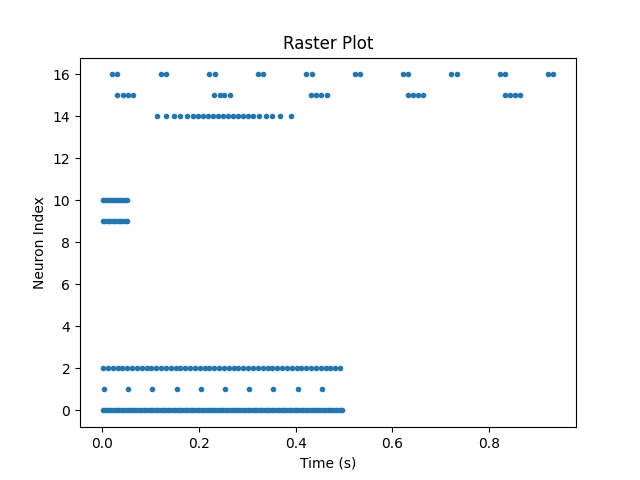

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(output_times,output_index,'.')
plt.xlabel('Time (s)')
plt.ylabel('Neuron Index')
plt.title('Raster Plot')
plt.show()

Plot the evolution of synaptic weights as they have been recorded during the simulation

<IPython.core.display.Javascript object>


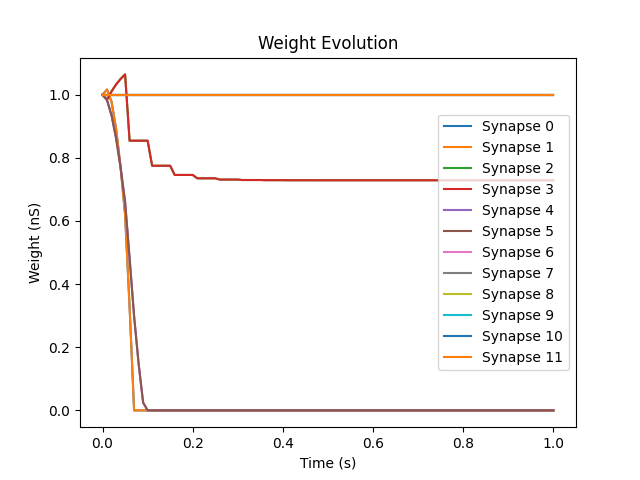

In [31]:
import numpy
plt.figure()
for y_arr, label in zip(numpy.transpose(weights), synaptic_layer):
    plt.plot(record_time, y_arr, label='Synapse '+str(label))
plt.xlabel('Time (s)')
plt.ylabel('Weight (nS)')
plt.title('Weight Evolution')
plt.legend()
plt.show()